# Ensembles
1. Bagging  
2. Random Subspace 
3. Boosting
4. Feature Importance from Random Forests

In [1]:
import pandas as pd
hotel_rev_pd = pd.read_csv('HotelRevHelpfulnessV2.csv')
hotel_rev_pd.head()

,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,aveRatingUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,4.333333,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,4.333333,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,4.166667,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,3.527778,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,3.500000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [2]:
y = hotel_rev_pd.pop('reviewHelpfulness').values
X = hotel_rev_pd.values
X.shape

(486, 23)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.ensemble import BaggingClassifier

kNN = KNeighborsClassifier(n_neighbors=3) 
dtree = DecisionTreeClassifier(criterion='entropy')

## Bagging
Ensembles based on Bagging. 
- 10 ensemble members are trained using bootstrap resampling
- Works for decision trees
- Doesn't work for k-NN

In [4]:
kNN_bag = BaggingClassifier(kNN, 
                            n_estimators = 10,
                            max_samples = 1.0, 
                            bootstrap = True)

tree_bag = BaggingClassifier(dtree, 
                            n_estimators = 10,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)

In [5]:
folds = 8
reps = 10
v = 10
cv=RepeatedKFold(n_repeats=reps, n_splits=folds)

scores_kNN = cross_val_score(kNN, X, y, cv=cv, verbose = v, n_jobs = -1)
scores_kNN_bag = cross_val_score(kNN_bag, X, y, cv=cv, verbose = v, n_jobs = -1)

print("Mean for kNN {:.2f}".format(scores_kNN.mean()))
print("Mean for kNN_bag {:.2f}".format(scores_kNN_bag.mean()))

scores_tree = cross_val_score(dtree, X, y, cv=cv, verbose = v, n_jobs = -1)
scores_tree_bag = cross_val_score(tree_bag, X, y, cv=cv, verbose = v, n_jobs = -1)

print("Mean for D-Tree {:.2f}".format(scores_tree.mean()))
print("Mean for D_Tree_bag {:.2f}".format(scores_tree_bag.mean()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1864s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0207s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  56 out of  80 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    4.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1299s.) Setting batch_si

Mean for kNN 0.63
Mean for kNN_bag 0.63


[Parallel(n_jobs=-1)]: Done  56 out of  80 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1075s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  56 out of  80 | elapsed:    1.1s remaining:    0.5s


Mean for D-Tree 0.65
Mean for D_Tree_bag 0.70


[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


---
## Random Subspace
The evaluation above shows that bootstrap resampling works for decision tree ensembles but not for k-NN.   
This is because k-NN is a *stable* classifier so boodstrap resampling does not produce diversity.  
  
However a random subspace strategy will produce diversity for k-NN.  
In the examples below we generate an ensemble of 10 classifiers each trained using a subet of 50% of the features selected at random.


In [6]:
random_SS_kNN = BaggingClassifier(kNN, 
                            n_estimators = 10,
                            max_samples=1.0, 
                            max_features=0.5)

random_SS_tree = BaggingClassifier(dtree, 
                            n_estimators = 10,
                            max_samples=1.0, 
                            max_features=0.5)

In [7]:
folds = 8
reps = 10
v = 0
cv=RepeatedKFold(n_repeats=reps, n_splits=folds)

scores_kNN = cross_val_score(kNN, X, y, cv=cv, verbose = v, n_jobs = -1)
scores_kNN_rSS = cross_val_score(random_SS_kNN, X, y, cv=cv, verbose = v, n_jobs = -1)

print("Mean for kNN {:.2f}".format(scores_kNN.mean()))
print("Mean for kNN_rand_SS {:.2f}".format(scores_kNN_rSS.mean()))

scores_tree = cross_val_score(dtree, X, y, cv=cv, verbose = v, n_jobs = -1)
scores_tree_rSS = cross_val_score(random_SS_tree, X, y, cv=cv, verbose = v, n_jobs = -1)

print("Mean for D-Tree {:.2f}".format(scores_tree.mean()))
print("Mean for D_Tree_rand_SS {:.2f}".format(scores_tree_rSS.mean()))

Mean for kNN 0.63
Mean for kNN_rand_SS 0.65
Mean for D-Tree 0.65
Mean for D_Tree_rand_SS 0.68


---
## Boosting
Default classifier is a Decision Tree of depth 1, a decision stump.

In [8]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(n_estimators=100, algorithm = 'SAMME')
scores_adaBoost = cross_val_score(adaBoost, X, y, cv=folds, verbose = v, n_jobs = -1)

scores_adaBoost.mean()  

0.7261612021857924

In [9]:
# Train Adaboost on all data and check weights for first 10 models
ab = adaBoost.fit(X,y)
ab.estimator_weights_[:10]

array([0.85514873, 0.43004882, 0.48229211, 0.4657541 , 0.12063232,
       0.35198136, 0.23122383, 0.13955368, 0.13043829, 0.12244209])

Text(0, 0.5, 'Error & Weight')

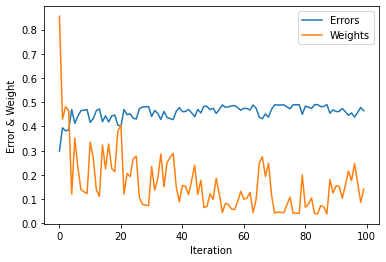

In [10]:
import matplotlib.pyplot as plt
plt.plot(ab.estimator_errors_, label='Errors')
plt.plot(ab.estimator_weights_, label='Weights')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Error & Weight")

---
<h1><span style="color:red">Bonus Material</span></h1>

## Random Forest Feature Importance
As a side effect of building so many decision trees Random Forest is able to provide an estimate of feature importance. 

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X,y)

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
RF.feature_importances_

array([0.13977995, 0.07287126, 0.1386167 , 0.14194925, 0.09146311,
       0.02520643, 0.00569735, 0.09172209, 0.01547085, 0.0297604 ,
       0.09322251, 0.01832222, 0.00742457, 0.00367284, 0.00173408,
       0.01795823, 0.03945371, 0.02390862, 0.00893415, 0.00999277,
       0.00418041, 0.00671372, 0.0119448 ])

In [13]:
FI_df = pd.DataFrame(RF.feature_importances_, index=hotel_rev_pd.columns,columns =['FI Score'])
FI_df.sort_values('FI Score', inplace=True, ascending = False)
FI_df

,FI Score
numReviewsUser,0.141949
aveHelpfulnessRatioUser,0.139780
pcReviewsExceedMinHelpfulnessSupport,0.138617
stdevRatingUser,0.093223
subRatingMeanUser,0.091722
numReviewsHotel,0.091463
stdevHelpfulnessRatioUser,0.072871
numberTermsEntry,0.039454
aveRatingUser,0.029760
ratingUser,0.025206


Text(0, 0.5, 'Feature Importance')

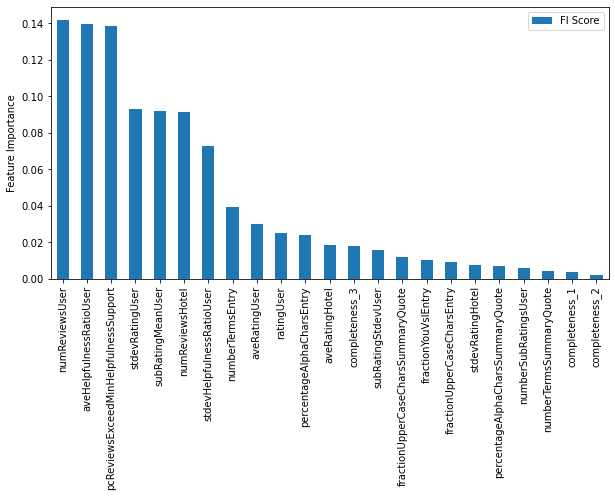

In [14]:
%matplotlib inline
pl = FI_df.plot.bar(figsize=(10,5))
pl.set_ylabel("Feature Importance")